Phase folding -> Taking multiple periods (1 transit per period) and overlay them on each other

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import lightkurve as lk

## Setting initial planet & pulling in sector data

In [2]:
TIC = 'TIC 55525572'
available_data_select = lk.search_lightcurve(TIC, author = 'SPOC')[0:9]
lc_collection = available_data_select.download_all().stitch() # Stitch the data from each sector onto one graph

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

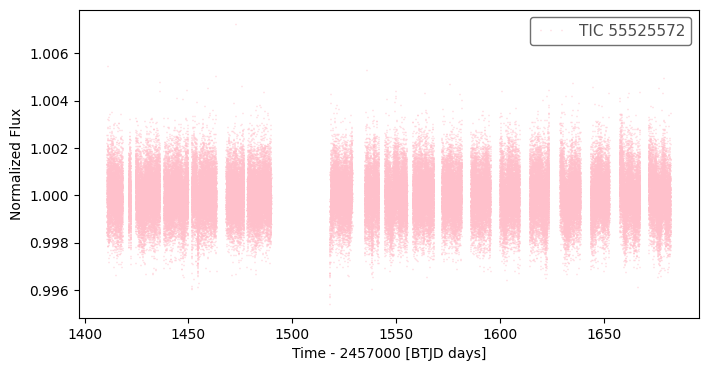

In [7]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8, 4))
lc_collection.plot(ax = ax, linewidth = 0, marker = 0, color = 'pink', markersize = 1, alpha = 0.8)

## Phase folding the object

In [8]:
period = 83.8979 # Get this from ExoFop -> are there IDs that aren't known?
t0 = 2125.847 # time of first transit

In [11]:
lc_phased = lc_collection.fold(period = period, epoch_time = t0)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

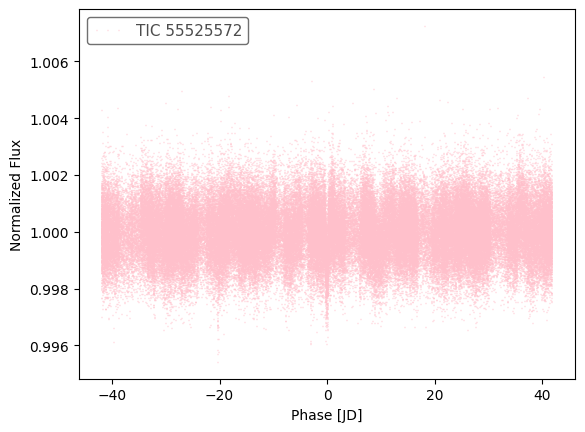

In [15]:
%matplotlib inline
fig, ax = plt.subplots()
lc_phased.plot(ax = ax, linewidth = 0, marker = 0, color = 'pink', markersize = 1, alpha = 0.8)

### Binning phased data

In [16]:
bin_time = 15/24/60 # Set the bin time in units of days
lc_phased_binned = lc_phased.bin(bin_time)

<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

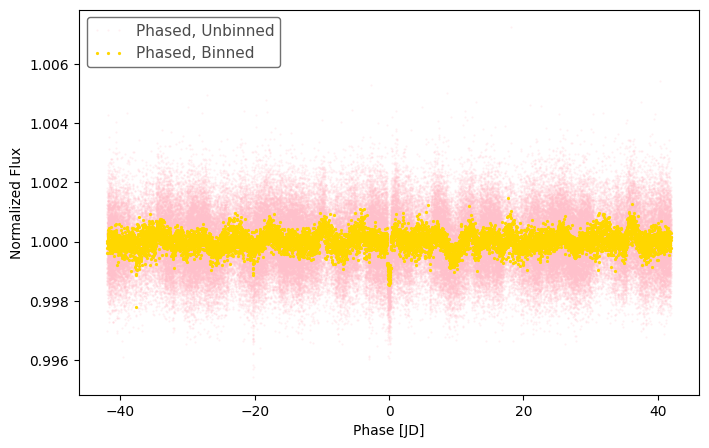

In [23]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8, 5)) # Determine impact on data shown by changing this field
lc_phased.plot(ax = ax, linewidth = 0, marker = '.', color = 'pink', markersize = 1, alpha = 0.25, label = 'Phased, Unbinned')
lc_phased_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markersize = 1.3, alpha = 0.999, label = 'Phased, Binned')

### Remove scatter
Since the curve has been phase folded, only the data from around t0 (0 on x axis) is really required as that is where a transit event is happening.
Of course this needs to be tweaked in the case of multiple planetary systems...

(0.996, 1.004)

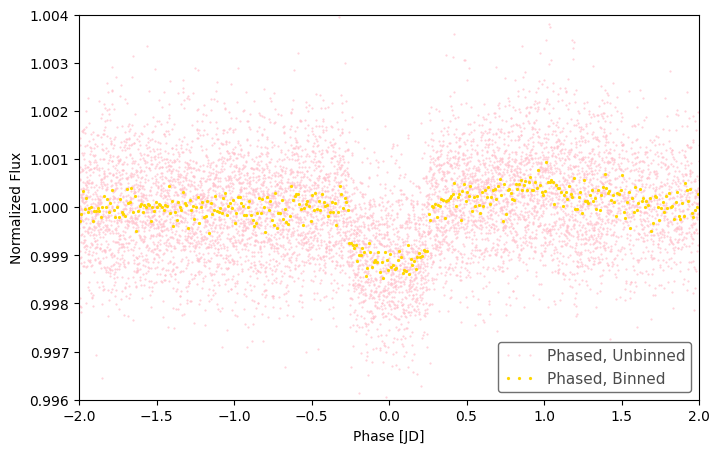

In [25]:
%matplotlib inline
fig, ax = plt.subplots(figsize = (8, 5)) # Determine impact on data shown by changing this field
lc_phased.plot(ax = ax, linewidth = 0, marker = '.', color = 'pink', markersize = 1, alpha = 0.8, label = 'Phased, Unbinned')
lc_phased_binned.plot(ax = ax, linewidth = 0, marker = 'o', color = 'gold', markersize = 1.3, alpha = 1, label = 'Phased, Binned')

plt.xlim(-2, 2)
plt.ylim(0.996, 1.004)

Use these graphs to determine the radius lol

/jk there's more data we can use